In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df_train = pd.read_csv("exoTrain.csv")
df_test = pd.read_csv("exoTest.csv")

In [3]:
df_train

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [4]:
df_test

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1,374.46,326.06,319.87,338.23,251.54,209.84,186.35,167.46,135.45,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,1,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,-4.54,-11.55,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,1,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,-13.12,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
568,1,91.36,85.60,48.81,48.69,70.05,22.30,11.63,37.86,28.27,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60


In [5]:
print('Le dataset d entrainement:')
print(df_train['LABEL'].value_counts())
print('Le dataset de test:')
print(df_test['LABEL'].value_counts())

Le dataset d entrainement:
1    5050
2      37
Name: LABEL, dtype: int64
Le dataset de test:
1    565
2      5
Name: LABEL, dtype: int64


In [6]:
X_train, y_train = df_train.drop(columns=['LABEL'], axis=1), df_train['LABEL']
X_test, y_test = df_test.drop(columns=['LABEL'], axis=1), df_test['LABEL']

In [7]:
# On divise les sets de test en deux parties afin de vérifier la variance. Ils feront la meme taille.

X_test_1, X_test_2 = X_test[:285], X_test[285:]
y_test_1, y_test_2 = y_test[:285], y_test[285:]

In [8]:
# On applique une fonction Standard Scaler aux deux ensembles X_train et X_test

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_1_scaled = scaler.transform(X_test_1)
X_test_2_scaled = scaler.transform(X_test_2)

# Machine learning

### Random Forest

In [9]:
RF = RandomForestClassifier()
RF.fit(X_train_scaled, df_train['LABEL'])

score_trainRF = RF.score(X_train_scaled, df_train['LABEL'])
score_test1RF = RF.score(X_test_1_scaled, y_test_1)
score_test2RF = RF.score(X_test_2_scaled, y_test_2)

print("Score d entrainement: ", score_trainRF)
print("Score de test du set 1: ", score_test1RF)
print("Score de test du set 2: ", score_test2RF)

Score d entrainement:  1.0
Score de test du set 1:  0.9824561403508771
Score de test du set 2:  1.0


### Regression logistique

In [10]:
LR = LogisticRegression()
LR.fit(X_train_scaled, df_train['LABEL'])

score_trainLR = LR.score(X_train_scaled, df_train['LABEL'])
score_test1LR = LR.score(X_test_1_scaled, y_test_1)
score_test2LR = LR.score(X_test_2_scaled, y_test_2)

print("Score d entrainement: ", score_trainLR)
print("Score de test du set 1: ", score_test1LR)
print("Score de test du set 2: ", score_test2LR)

Score d entrainement:  0.9933162964419108
Score de test du set 1:  0.9824561403508771
Score de test du set 2:  0.9964912280701754


C:\Users\hugol\miniconda3\envs\firstproject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
GB = GradientBoostingClassifier()
GB.fit(X_train_scaled, df_train['LABEL'])

score_trainGB = RF.score(X_train_scaled, df_train['LABEL'])
score_test1GB = RF.score(X_test_1_scaled, y_test_1)
score_test2GB = RF.score(X_test_2_scaled, y_test_2)

print("Score d entrainement: ", score_trainGB)
print("Score de test du set 1: ", score_test1GB)
print("Score de test du set 2: ", score_test2GB)

KeyboardInterrupt: 

C:\Users\hugol\miniconda3\envs\firstproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution des classes \n (0: Non-Exoplanete || 1: Exoplanete)')

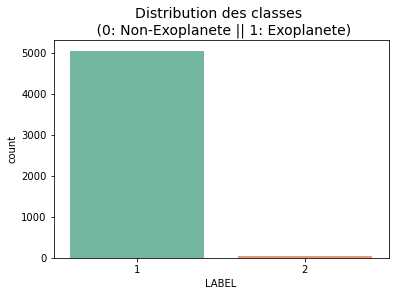

In [14]:
import seaborn as sns
sns.countplot('LABEL', data=df_train, palette="Set2")
plt.title('Distribution des classes \n (0: Non-Exoplanete || 1: Exoplanete)', fontsize=14) 

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

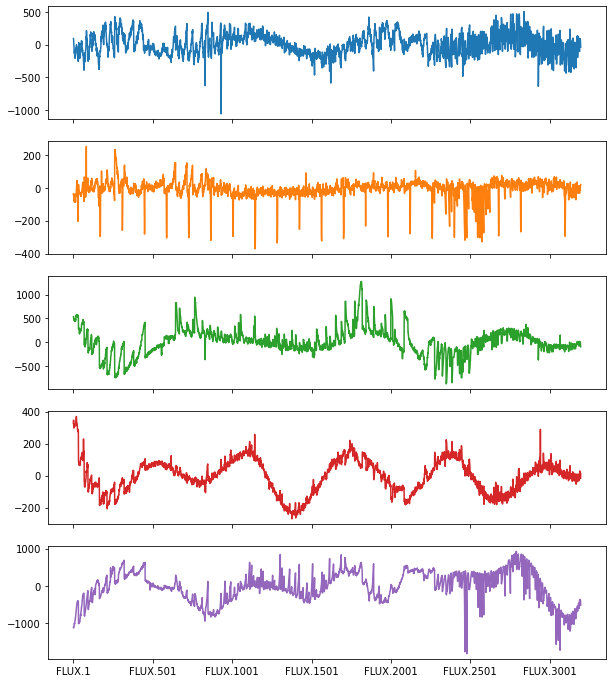

In [16]:
X_train.loc[y_train == 2][:5].T.plot(subplots=True, figsize=(10, 12), sharex=True, sharey=False, legend=False)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

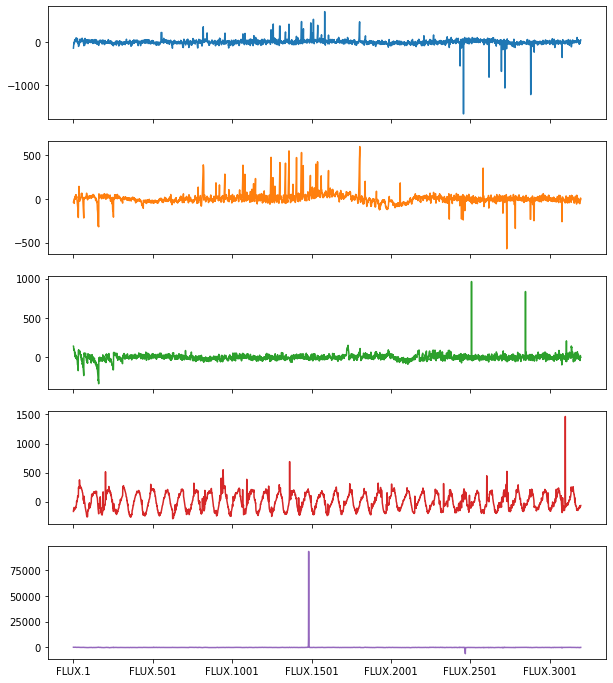

In [17]:
X_train.loc[y_train == 1][:5].T.plot(subplots=True, figsize=(10, 12), sharex = True, sharey = False, legend = False)